In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.18.0


In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
# normalisse images to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# conversion rgb to grayscale
x_train_gray = tf.image.rgb_to_grayscale(x_train).numpy()
x_test_gray = tf.image.rgb_to_grayscale(x_test).numpy()
print('x_train shape:', x_train.shape)
print('x_train_gray shape:', x_train_gray.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
x_train shape: (50000, 32, 32, 3)
x_train_gray shape: (50000, 32, 32, 1)


In [3]:
input_img = layers.Input(shape=(32, 32, 1))
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

output_img = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

model = models.Model(input_img, output_img)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 3)           │           3,459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,883 (448.76 KB)

 Trainable params: 114,883 (448.76 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer="adam", loss='mse')
history = model.fit(x_train_gray, x_train, validation_data=(x_test_gray, x_test), epochs=30, batch_size=32)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 0.0105 - val_loss: 0.0060
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 12/30
1563/

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


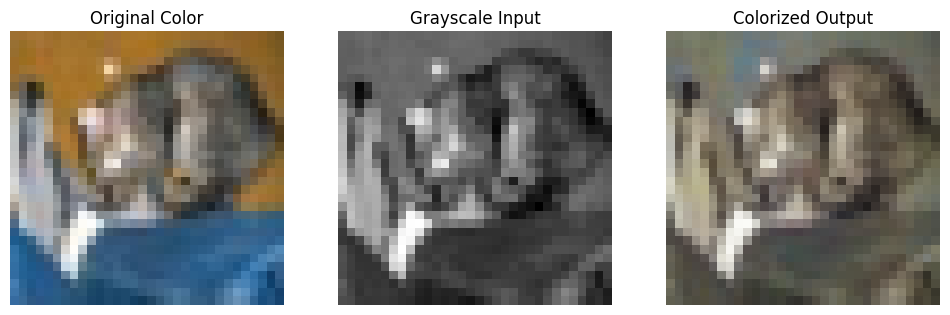

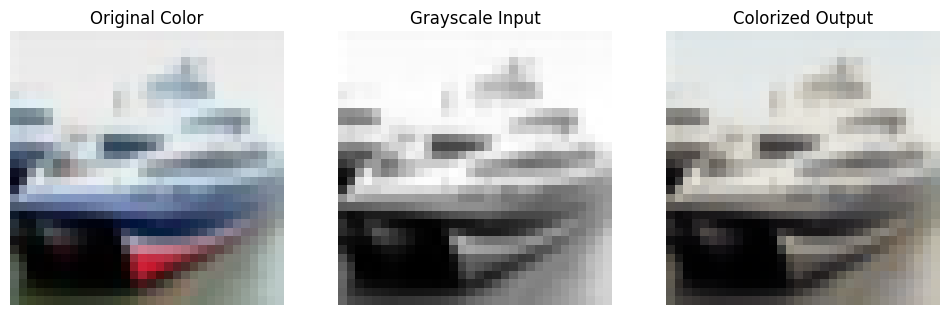

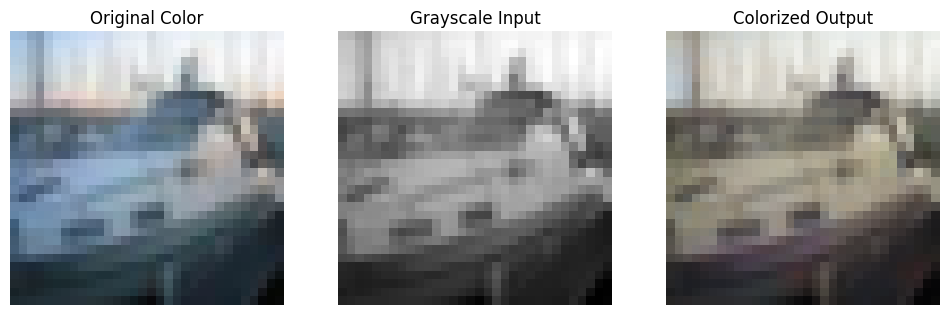

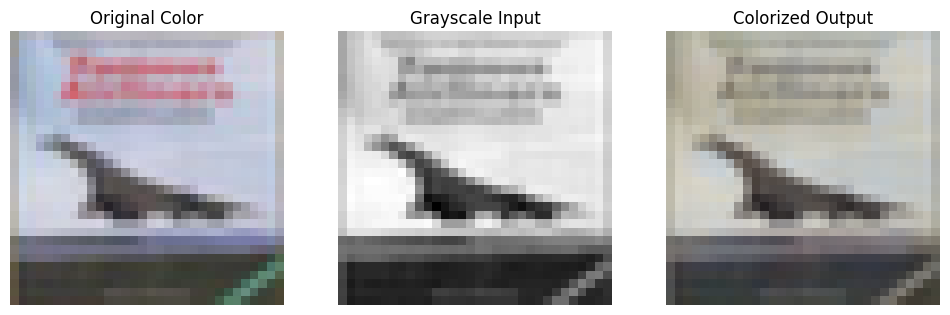

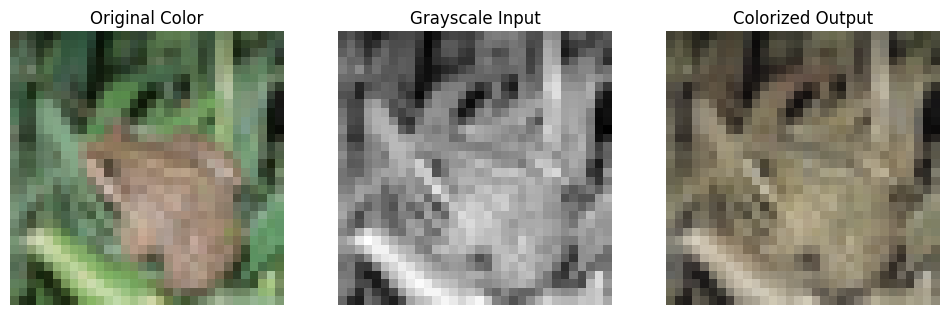

In [ ]:
preds = model.predict(x_test_gray[:5])

for i in range(5):
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.imshow(x_test[i])
    plt.title('original Color')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(x_test_gray[i].squeeze(), cmap='gray')
    plt.title('Grayscale Input')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(preds[i])
    plt.title('Coloriszed Output')
    plt.axis('off')
    plt.show()

Saving pexels-cheryl-brigham-799938280-19487371.jpg to pexels-cheryl-brigham-799938280-19487371.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


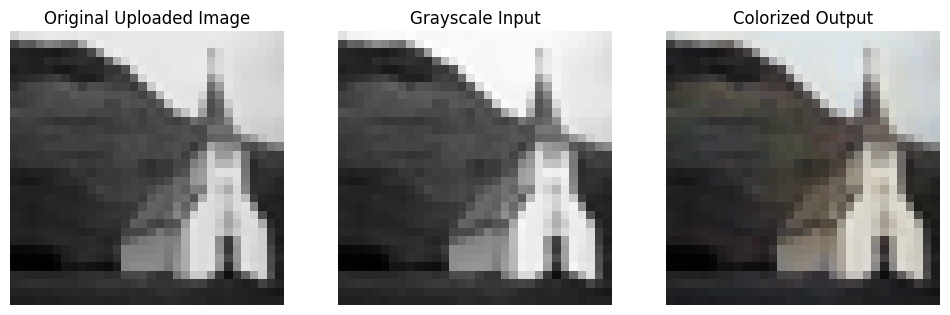

In [ ]:
from google.colab import files
from PIL import Image
import io
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
Uploaded_Image = files.upload()

for filename in Uploaded_Image.keys():
    img = Image.open(io.BytesIO(Uploaded_Image[filename])).convert('RGB')
    img_resized = img.resize((32, 32))  # to match the model's expected input size

    # normalize to [0,1]
    img_array = np.array(img_resized).astype('float32') / 255.0
    # add batch dimension
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Conversion
    img_gray = tf.image.rgb_to_grayscale(img_array_expanded)

    # use our model
    pred_color = model.predict(img_gray)
    pred_color = pred_color[0]
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(img_resized)
    plt.title('Original your uploaded image')
    plt.axis('off')
    img_gray_np = img_gray.numpy()
    plt.subplot(1, 3, 2)
    plt.imshow(img_gray_np[0].squeeze(), cmap='gray')
    plt.title('Grayscale Input')
    plt.axis('off')

    # Colorized output
    plt.subplot(1, 3, 3)
    plt.imshow(pred_color)
    plt.title('the Colorized Output')
    plt.axis('off')
    plt.show()

In [ ]:
from google.colab import files

# this one run to download and Save the entire model (architecture + weights)
model.save("saved_model.h5")
files.download("saved_model.h5")

# Save only the model weights correctly
model.save_weights("model_weights.weights.h5")  # Corrected filename
files.download("model_weights.weights.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>